# Tensorflow ile Resim Sınıflandırma Projesi

**Uyarı:** **Çalışma zamanı** menüsünden **Çalışma zamanı türünü değiştir**e tıklayarak **Donanım Hızlandırıcı**yı ***GPU*** olarak seçmelisiniz.

## Kütüphanelerin İndirilmesi

In [1]:
# Kütüphane kurulumu için etkinleştirin.
!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install tflite-model-maker

## Kütüphanelerin projeye dahil edilmesi

In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import configs
from tflite_model_maker import ExportFormat
from tflite_model_maker import image_classifier
from tflite_model_maker import ImageClassifierDataLoader
from tflite_model_maker import model_spec

import matplotlib.pyplot as plt

## Veri Setinin Tanıtılması

In [3]:
resim_yolu = "/content/drive/My Drive/yapay_zeka_proje_odevi/ilac_veri_seti"

In [4]:
data = ImageClassifierDataLoader.from_folder(resim_yolu)

# Eğitim verilerine (% 80), doğrulama verilerine (% 10, isteğe bağlı) ve test verilerine (% 10) ayırdık.
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Load image with size: 400, num_label: 10, labels: alatab, citoles, co-diovan, diaformin, ecoprin, glifor, nexium, parol, tranko-buskas, vermidon.


## Eğitim İçin Model Oluşturulması

In [5]:
# Yüklenen verilere göre özel bir görüntü sınıflandırıcı modeli oluşturalım.
# Varsayılan model: EfficientNet-Lite0
# model_spec=model_spec.mobilenet_v2_spec argümanı eklenerek değiştirebiliriz. 
model_EfficientNet = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 3,425,834
Trainable params: 12,810
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
10/10 [==============================] - 233s 23s/step - loss: 2.4415 - accuracy: 0.1321 - val_loss: 2.1771 - val_accuracy: 0.1562
Epoch 2/5
10/10 [==============================] - 44s 5s/step - loss: 1.7902 - accuracy: 0.4641 - val_loss: 1.3495 - val_accuracy: 0.8438
Epoch 3/5
10/10 [============================

## Modelin Sonucu ve Değerlendirilmesi

In [6]:
# Modelin sonucunu değerlendirelim, modelin kaybını ve doğruluğunu alalım.
loss, accuracy = model_EfficientNet.evaluate(test_data)

2/2 [==============================] - 27s 5s/step - loss: 0.7548 - accuracy: 0.9750


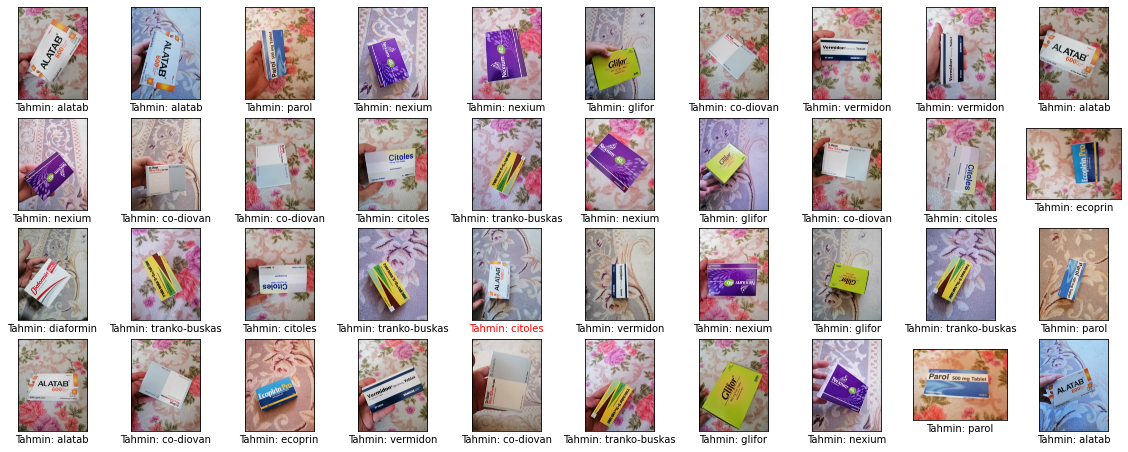

In [7]:
# İki giriş parametresinin eşleşip eşleşmediğine bağlı olarak 
# 'kırmızı' / 'siyah' döndüren bir yardımcı işlev.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# 100 test görüntüsünü ve bunların tahmin edilen etiketlerini çizer.
# Tahmin sonucu, "test" te sağlanan etikette belirtilenden farklıysa
# o kırmızı renkle vurgulanır.
plt.figure(figsize=(20, 20))
predicts = model_EfficientNet.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.dataset.take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Tahmin: %s' % predict_label)
plt.show()

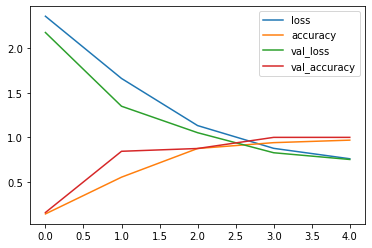

In [8]:
kayipVerisi_EfficientNet = pd.DataFrame(model_EfficientNet.history.history)
kayipVerisi_EfficientNet.plot()

## Modelin Kaydedilmesi

In [9]:
# Model çıktımızı tflite formatında alalım.
model_EfficientNet.export(tflite_filename='model_EfficientNet.tflite', export_dir='/content/drive/My Drive/yapay_zeka_proje_odevi/', export_format=ExportFormat.TFLITE)
model_EfficientNet.export(tflite_filename='model_EfficientNetLabels.txt', export_dir='/content/drive/My Drive/yapay_zeka_proje_odevi/', export_format=ExportFormat.LABEL)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /tmp/tmpchhwk1w6/assets


INFO:tensorflow:Assets written to: /tmp/tmpchhwk1w6/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpetma4vp8/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpetma4vp8/labels.txt.


INFO:tensorflow:Saving labels in /content/drive/My Drive/yapay_zeka_proje_odevi/labels.txt.


INFO:tensorflow:Saving labels in /content/drive/My Drive/yapay_zeka_proje_odevi/labels.txt.


## MobileNetV2 ile Eğitim Yapalım

In [10]:
# model_spec=model_spec.mobilenet_v2_spec argümanı eklenerek değiştirebiliriz. 
model_MobileNet = image_classifier.create(train_data, model_spec=model_spec.mobilenet_v2_spec, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5
10/10 [==============================] - 43s 4s/step - loss: 2.6624 - accuracy: 0.2027 - val_loss: 2.1609 - val_accuracy: 0.2188
Epoch 2/5
10/10 [==============================] - 38s 4s/step - loss: 1.6588 - accuracy: 0.5087 - val_loss: 1.2325 - val_accuracy: 0.7812
Epoch 3/5
10/10 [==============================] - 35s 4s/step - loss: 0.9734 - accura

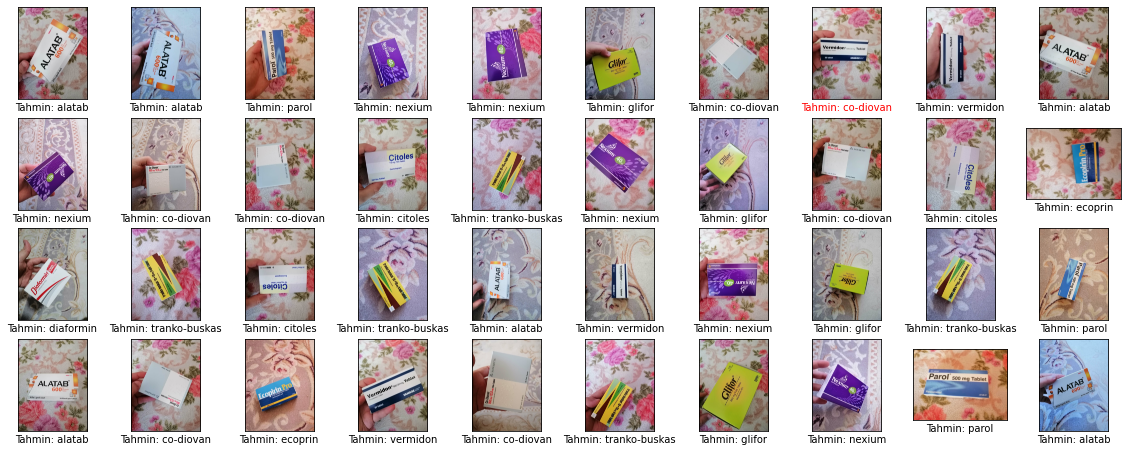

In [11]:
# İki giriş parametresinin eşleşip eşleşmediğine bağlı olarak 
# 'kırmızı' / 'siyah' döndüren bir yardımcı işlev.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# 100 test görüntüsünü ve bunların tahmin edilen etiketlerini çizer.
# Tahmin sonucu, "test" te sağlanan etikette belirtilenden farklıysa
# o kırmızı renkle vurgulanır.
plt.figure(figsize=(20, 20))
predicts = model_MobileNet.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.dataset.take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Tahmin: %s' % predict_label)
plt.show()

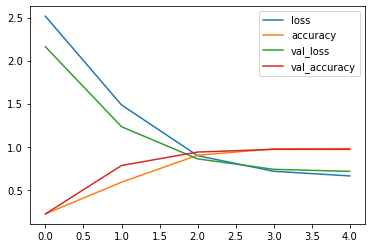

In [12]:
kayipVerisi_MobileNet = pd.DataFrame(model_MobileNet.history.history)
kayipVerisi_MobileNet.plot()

In [13]:
# Model çıktımızı tflite formatında alalım.
model_MobileNet.export(tflite_filename='model_MobileNet.tflite', export_dir='/content/drive/My Drive/yapay_zeka_proje_odevi/', export_format=ExportFormat.TFLITE)
model_MobileNet.export(tflite_filename='model_MobileNetLabels.txt', export_dir='/content/drive/My Drive/yapay_zeka_proje_odevi/', export_format=ExportFormat.LABEL)

INFO:tensorflow:Assets written to: /tmp/tmp8q7yk1cd/assets


INFO:tensorflow:Assets written to: /tmp/tmp8q7yk1cd/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpubp_ayf_/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpubp_ayf_/labels.txt.


INFO:tensorflow:Saving labels in /content/drive/My Drive/yapay_zeka_proje_odevi/labels.txt.


INFO:tensorflow:Saving labels in /content/drive/My Drive/yapay_zeka_proje_odevi/labels.txt.


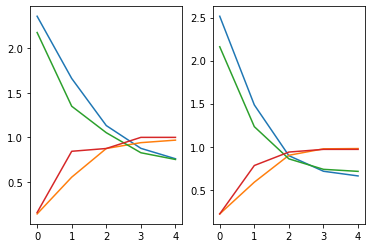

In [14]:
plt.subplot(1,2,1)
#1 satıra 2 sütunluk 1. grafik
plt.plot(kayipVerisi_EfficientNet)

plt.subplot(1,2,2)
#1 satıra 2 sütunluk 2. grafik
plt.plot(kayipVerisi_MobileNet)

In [15]:
print("EfficientNet ile Eğitim", "\n")
print(kayipVerisi_EfficientNet, "\n")

print("MobileNet ile Eğitim", "\n")
print(kayipVerisi_MobileNet)

EfficientNet ile Eğitim 

       loss  accuracy  val_loss  val_accuracy
0  2.359690  0.140625  2.177130       0.15625
1  1.661248  0.553125  1.349483       0.84375
2  1.132273  0.875000  1.052349       0.87500
3  0.876705  0.940625  0.827269       1.00000
4  0.759870  0.968750  0.751796       1.00000 

MobileNet ile Eğitim 

       loss  accuracy  val_loss  val_accuracy
0  2.515449  0.218750  2.160939       0.21875
1  1.485147  0.587500  1.232460       0.78125
2  0.895172  0.900000  0.858362       0.93750
3  0.714304  0.975000  0.736785       0.96875
4  0.660126  0.978125  0.713144       0.96875
